In [ ]:
import pandas as pd

diabetes_data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv", header=None)
x = diabetes_data.iloc[:, :-1].values
y = diabetes_data.iloc[:, -1].values


In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
k = 5
kf = KFold(n_splits=k, shuffle=True)
scaler = StandardScaler()

# K-fold çapraz doğrulama
for train_idx, test_idx in kf.split(x):
    x_train, x_test = x[train_idx], x[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    

In [ ]:
# Verileri standartlaştır
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Modeli oluştur
model = Sequential()
model.add(Dense(16, input_dim=8, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    

In [ ]:
# Modeli eğit ve değerlendir
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=150, verbose=0)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

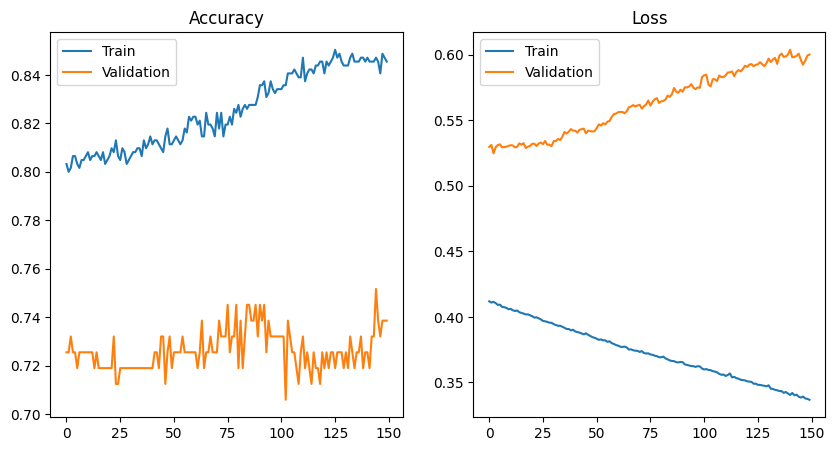

In [ ]:
# Eğitim ve doğrulama başarım ve kayıplarını görselleştir
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(train_acc, label='Train')
axs[0].plot(val_acc, label='Validation')
axs[0].set_title('Accuracy')
axs[0].legend()
axs[1].plot(train_loss, label='Train')
axs[1].plot(val_loss, label='Validation')
axs[1].set_title('Loss')
axs[1].legend()
plt.show()


5/5 [==============================] - 0s 19ms/step


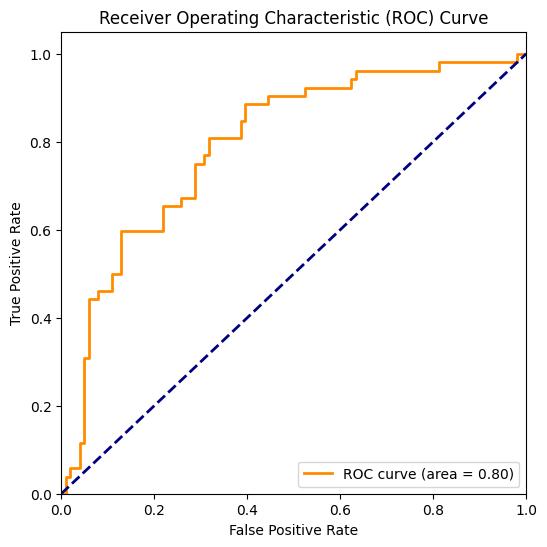

In [ ]:
from sklearn.metrics import roc_curve, auc

# Modelin tahminlerini al
y_pred = model.predict(x_test).ravel()

# ROC eğrisi oluştur
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# ROC eğrisini görselleştir
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
